# Exercise 5 – Analysis of India's Air Quality

Notebook Written By: WDY (Yale-NUS '24) 
(Come say hi at https://www.linkedin.com/in/dys-profile/)

### Introduction

We will be working with a dataset on the aftermath of India's Air Quality. 

PM2.5 is an important air quality index (AQI):

http://airnow.gov/index.cfm?action=aqibasics.aqi.

The data for each city can be found here:

https://www.airnow.gov/

This data set contains hourly PM2.5 measurements for the month of June, 2016, in five cities in India. PM2.5 is very small (“fine”) particulate matter – see

https://blissair.com/what-is-pm-2-5.htm, one of several common measurements used in studies of air quality.

Let's read the data into the notebook first. Following that, let's do a quick look through of the dataset to find any interesting information.

In [1]:
x <- read.csv("C:/Users/Admin/OneDrive/Documents/Yale-NUS/Quantitative Reasoning/Quantitative Reasoning Repository/Exercise 5 - Analyzing India Air Quality/India_AirQuality.csv")

In [27]:
head(x)

DateTime,Chennai,Delhi,Hyderabad,Kolkata,hour,date
1/6/16 1:00,20,34,32,41,1,1
1/6/16 2:00,32,43,40,33,2,1
1/6/16 3:00,36,74,39,28,3,1
1/6/16 4:00,27,52,33,18,4,1
1/6/16 5:00,31,46,35,22,5,1
1/6/16 6:00,33,38,35,23,6,1


In [7]:
tail(x)

,DateTime,Chennai,Delhi,Hyderabad,Kolkata,hour,date
715,30/6/16 19:00,35,41,-15,24,19,30
716,30/6/16 20:00,43,45,NA,18,20,30
717,30/6/16 21:00,27,39,NA,25,21,30
718,30/6/16 22:00,33,45,NA,29,22,30
719,30/6/16 23:00,32,44,NA,15,23,30
720,30/6/16 23:59,28,39,NA,17,24,30


In [8]:
str(x)

'data.frame':	720 obs. of  7 variables:
 $ DateTime : Factor w/ 720 levels "1/6/16 1:00",..: 1 12 18 19 20 21 22 23 24 2 ...
 $ Chennai  : int  20 32 36 27 31 33 27 28 31 27 ...
 $ Delhi    : int  34 43 74 52 46 38 46 38 48 52 ...
 $ Hyderabad: int  32 40 39 33 35 35 30 42 43 34 ...
 $ Kolkata  : int  41 33 28 18 22 23 30 27 24 22 ...
 $ hour     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ date     : int  1 1 1 1 1 1 1 1 1 1 ...


In [9]:
dim(x)

[1] 720   7

## Step 1: Pick a city: Chennai, Hyderabad, Kolkata.

For your city, calculate the following: the minimum, maximum, mean, median, standard deviation, interquartile range, and the 5th and 95th percentiles (or quantiles).

Calculate the number of missing values by using functions sum and is.na.

In [11]:
min(x$Delhi)

[1] 6

In [12]:
max(x$Delhi)

[1] 129

In [13]:
mean(x$Delhi)

[1] 49.06528

In [14]:
median(x$Delhi)

[1] 48

In [15]:
sd(x$Delhi)

[1] 19.08148

In [16]:
IQR(x$Delhi)

[1] 23

In [18]:
quantile(x$Delhi, probs = c(0.05, 0.95))

# We can use the probs argument to get basically any quantile metric that we want.

5%   95% 
21.95 84.00

In [19]:
sum(is.na(x$Delhi))

[1] 0

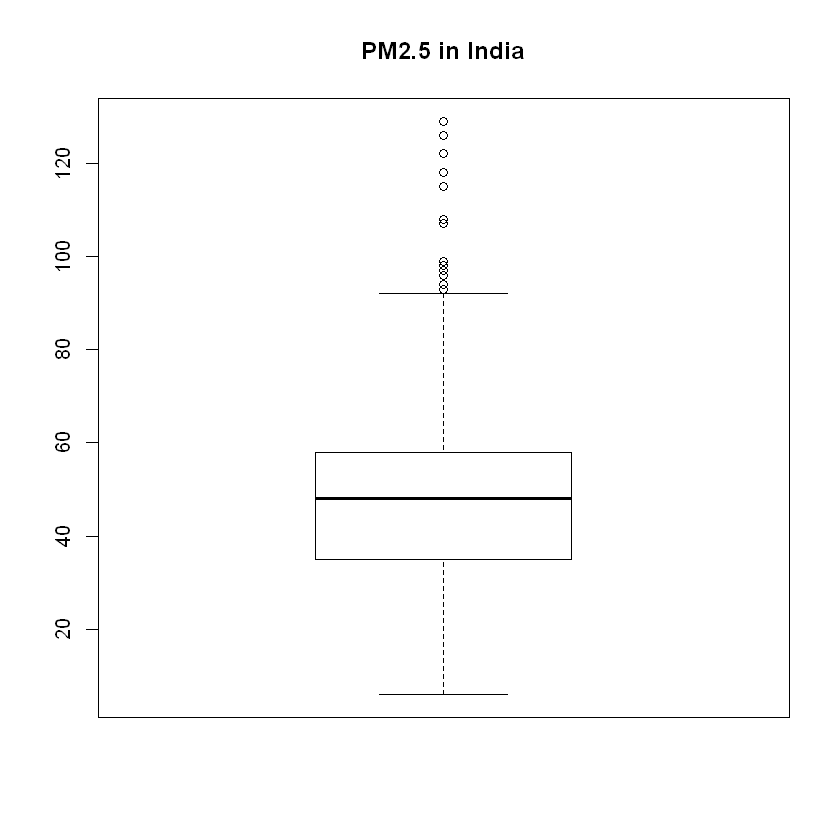

In [21]:
boxplot(x$Delhi,
       main = "PM2.5 in India")

## Step 2: We would like to find out what is the pollution cycle over a day for your assigned city. 

In the dataset, there is a variable, hour, which indicates a hour of day at which the measurement was taken.

For your city, calculate the mean of the PM2.5 for each hour. Hint: use the aggregate function.

In [34]:
# The logic for this is: Delhi PM2.5 as a group of the hour. Think of it like SQL's groupby()

Delhi_hour <- aggregate(Delhi ~ hour, data = x, FUN = mean)
head(Delhi_hour)

# If you use x$Delhi, you get a column as such. Then, you will need to rename the columns. That is more trouble for no point.

hour,Delhi
1,48.46667
2,49.23333
3,50.26667
4,48.80000
5,49.03333
6,49.46667


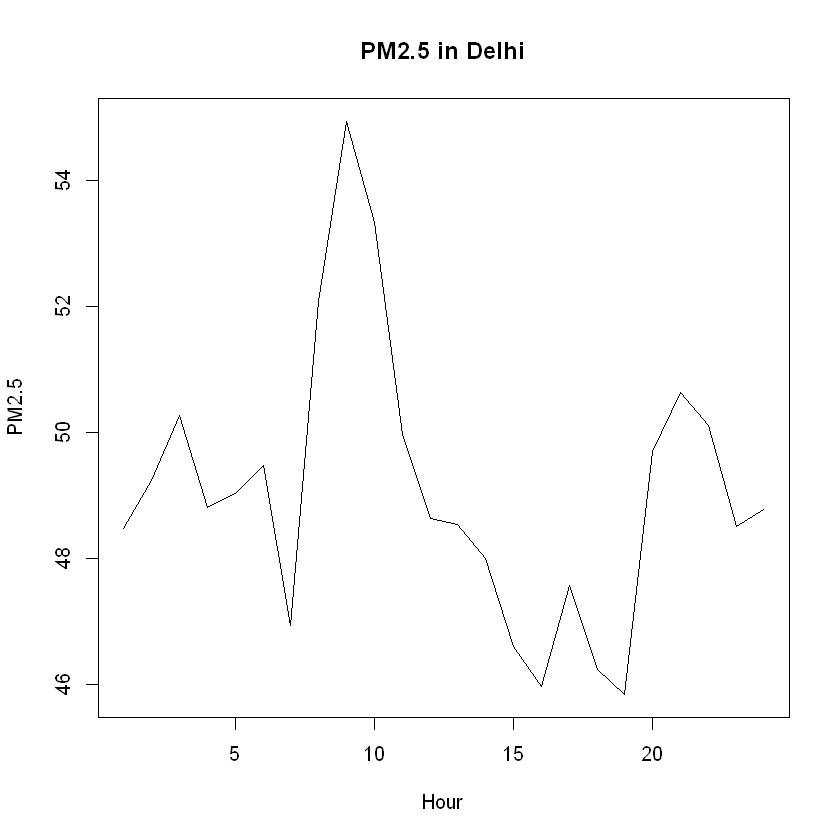

In [35]:
plot(Delhi_hour$Delhi, 
     type="l", 
     main="PM2.5 in Delhi", 
     xlab="Hour", 
     ylab="PM2.5")

# Type parameter allows you to change from a scatter plot which is the default setting for plot() to line plot.

## Step 3: We would like to find out what is the pollution cycle over a day for the rest of the cities

In [37]:
Chennai_hour <- aggregate(Chennai~hour, data= x, FUN = mean)
Hyderabad_hour <- aggregate(Hyderabad~hour, data= x, FUN = mean)
Kolkata_hour <- aggregate(Kolkata~hour, data= x, FUN = mean)

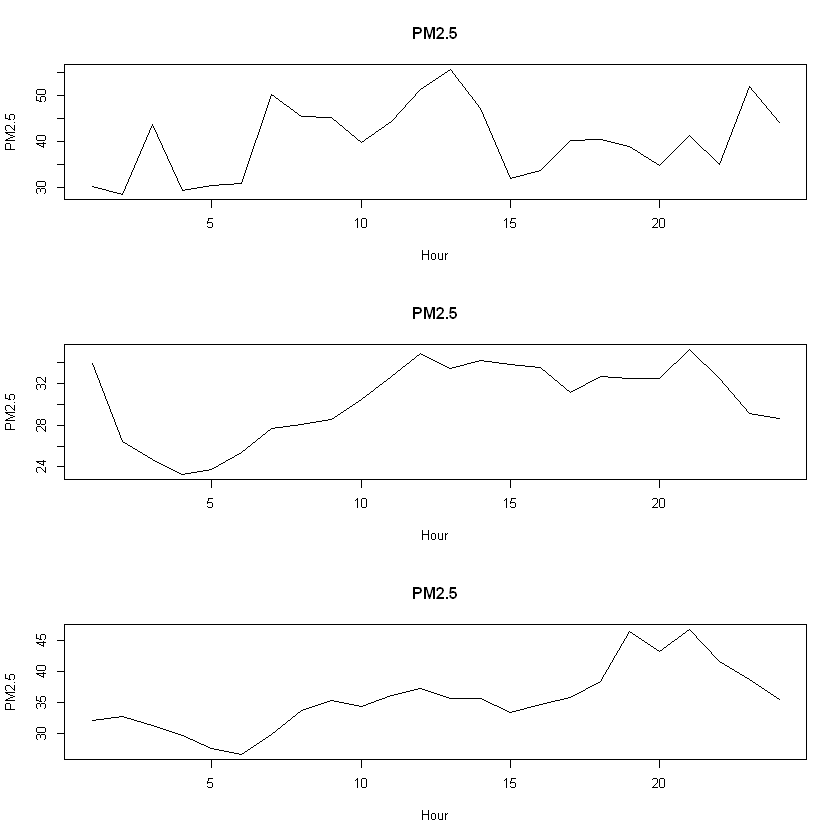

In [47]:
# par(mfrow) helps set charts beside each other

par(mfrow = c(3,1))

plot(Chennai_hour$Chennai, type="l", main="PM2.5", xlab="Hour", ylab="PM2.5")

plot(Kolkata_hour$Kolkata, type="l", main="PM2.5", xlab="Hour", ylab="PM2.5")

plot(Hyderabad_hour$Hyderabad, type="l", main="PM2.5", xlab="Hour", ylab="PM2.5")

par(mfrow=c(1,1))

## Step 4: Fix the scales of the graphs

As the graphs are not consistent in range, there is a need to adjust their range. We should begin by finding the overall maximum and minimum values of the hourly average of PM2.5 over all cities.

In [41]:
range(Delhi_hour$Delhi, na.rm=TRUE)

[1] 45.83333 54.93333

In [42]:
range(Chennai_hour$Chennai, na.rm=TRUE)

[1] 28.51724 55.64286

In [43]:
range(Hyderabad_hour$Hyderabad, na.rm=TRUE)

[1] 26.66667 46.77778

In [44]:
range(Kolkata_hour$Kolkata, na.rm=TRUE)

[1] 23.30000 35.23333

Afterwards, we should now set a scale that goes from 23 to 56.

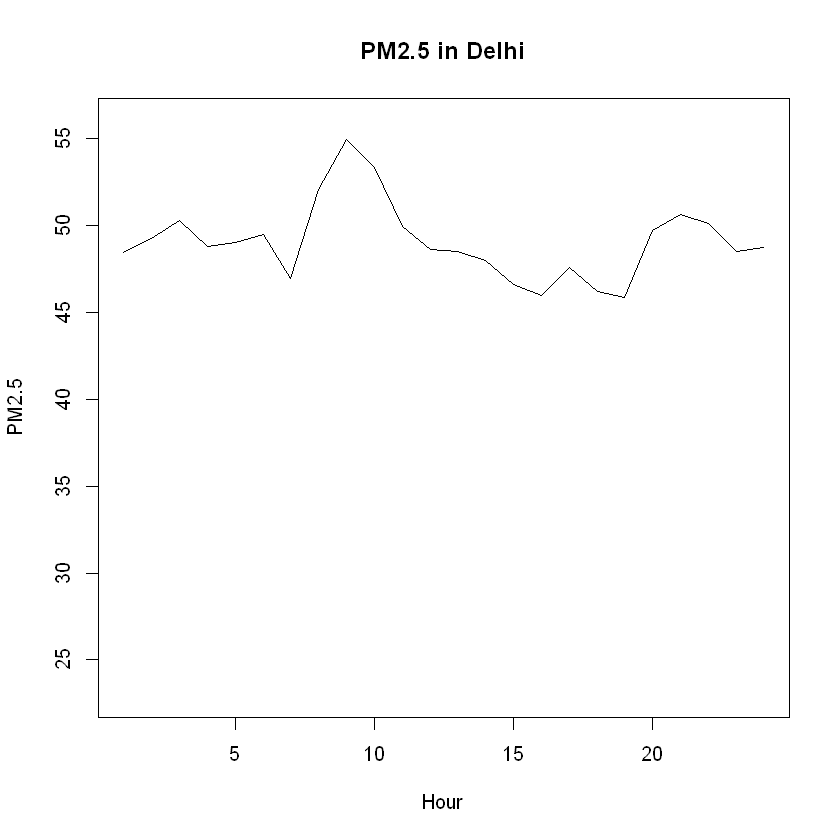

In [46]:
plot(Delhi_hour$Delhi, 
     type="l", 
     main="PM2.5 in Delhi",
     xlab="Hour", 
     ylab="PM2.5", 
     ylim=c(23, 56))

## Step 5: Let's slot the graphs into 1 graph.

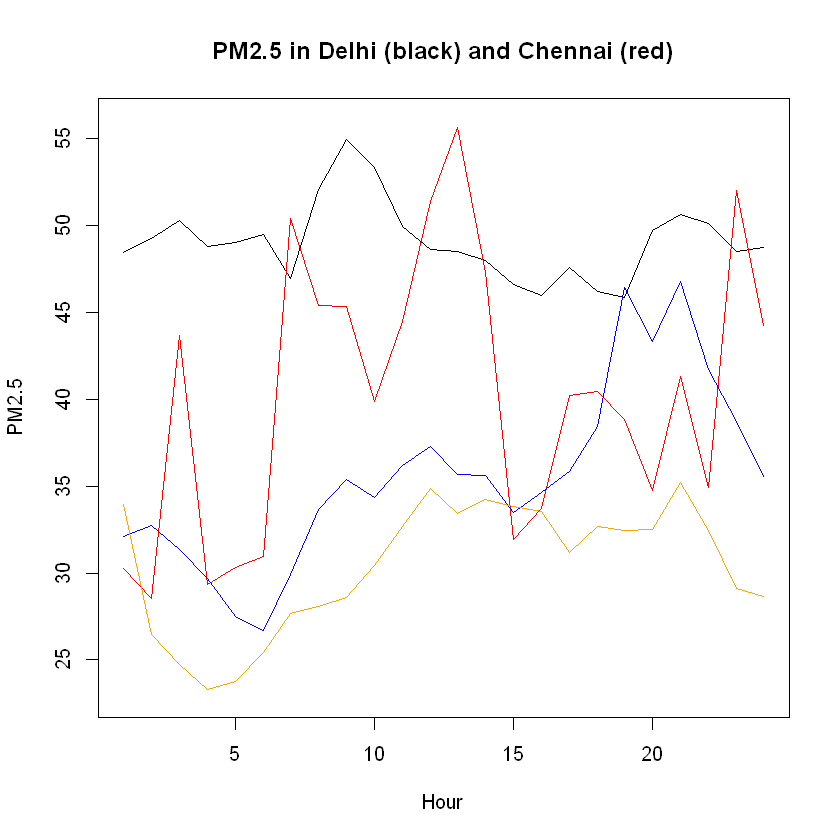

In [50]:
plot(Delhi_hour$Delhi, 
     type="l", 
     xlab="Hour", 
     ylab="PM2.5", 
     ylim=c(23, 56),
     main="PM2.5 in Delhi (black) and Chennai (red)")

# Adding lines() function helps add another line with the data point, and according to the scale and labels set in the either plot

# col parameter stands for colour

lines(Chennai_hour$Chennai, col="red")

lines(Hyderabad_hour$Hyderabad , col="blue")

lines(Kolkata_hour$Kolkata, col="orange")

## Step 6: Use the boxplot to gauge the distribution for each hour.

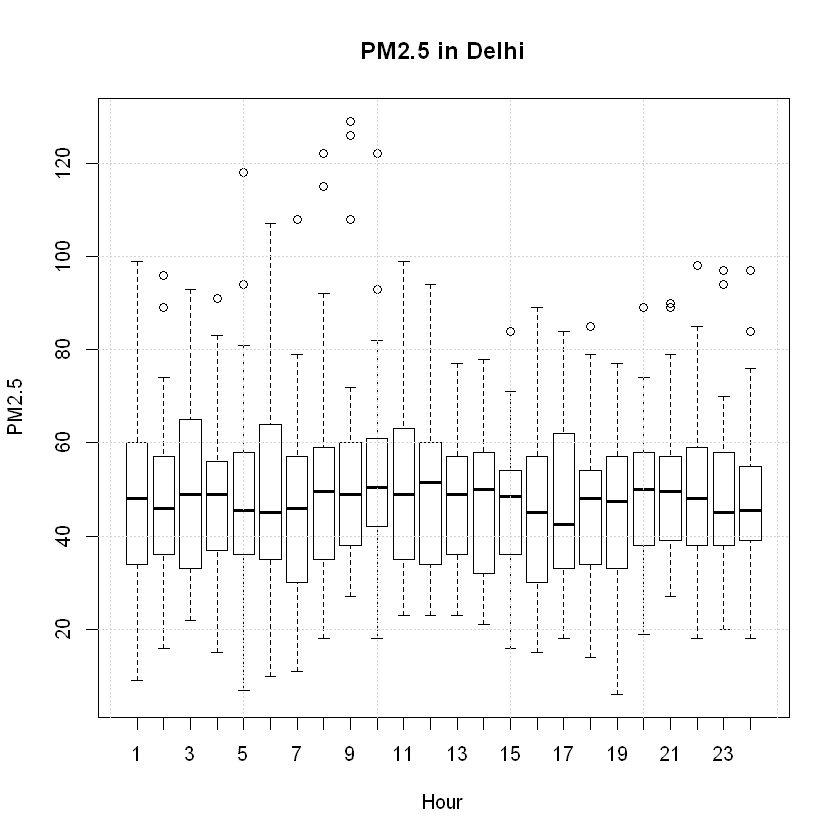

In [53]:
# Where Delhi's PM2.5 rating is a subset of the hours recorded

boxplot(x$Delhi ~ x$hour, 
        main="PM2.5 in Delhi", 
        xlab="Hour", ylab="PM2.5")
grid()

## Step 7: How often is PM2.5 at an unhealthy level? 

In [67]:
Level <- 100

vector <- 100 * c(sum(x$Chennai >= Level, na.rm = TRUE)/sum(!is.na(x$Chennai)),
  sum(x$Delhi >= Level, na.rm = TRUE)/sum(!is.na(x$Delhi)),
  sum(x$Hyderabad >= Level, na.rm = TRUE)/sum(!is.na(x$Hyderabad)),
  sum(x$Kolkata >= Level, na.rm = TRUE)/sum(!is.na(x$Kolkata)))

# Create a data frame so that it is easier to see

df <- data.frame(matrix(ncol = 1, nrow = 4))
rownames(df) <- c("Chennai", "Delhi", "Hyderabad", "Kolkata")
colnames(df) <- c("Rating")

for (i in 1:4) {
    df$Rating[i] <- paste(vector[i], "%") 
}
df

,Rating
Chennai,5.86552217453505 %
Delhi,1.25 %
Hyderabad,0.154798761609907 %
Kolkata,0.141242937853107 %
